# Imports

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf
from tensorflow.keras import Input

# Load Dataset

In [25]:
data = pd.read_csv("train.csv")
data

C:\Users\PCCV\AppData\Local\Temp\ipykernel_30516\2108927102.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [26]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## HANDLING CORRUPTED DATA 

In [28]:
data['Annual_Income'] = data['Annual_Income'].str.replace("_" , "").astype(float)
if data['Annual_Income'].dtype == 'object':
    data['Annual_Income'].str.replace("," , "").astype(float)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace("_" , "").astype(float)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].str.replace("_" , "")
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace("", np.nan).astype(float)
data['Credit_Mix'] = data['Credit_Mix'].str.replace("_" , "")
data['Credit_Mix'] = data['Credit_Mix'].replace("", np.nan)
data['Occupation'] = data['Occupation'].str.replace("_" , "")
data['Occupation'] = data['Occupation'].replace("", np.nan)
data['Payment_Behaviour'] = data['Payment_Behaviour'].str.replace("!@9#%8" , "")
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace("", np.nan)

# Convert columns to numeric, invalid parsing will be set as NaN

In [29]:
columns_to_convert = ['Monthly_Balance','Amount_invested_monthly','Annual_Income','Age', 'Num_of_Loan', 'Outstanding_Debt', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit']

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Filtering Outliers by IQR

In [30]:
columns_to_remove_outliers = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
   'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
   'Amount_invested_monthly','Monthly_Balance'
]

for column in columns_to_remove_outliers:
    Q1 = data[column].quantile(0.15)
    Q3 = data[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), np.nan, data[column])

# Dropping unnecessary columns

In [31]:
data = data.drop(columns=['Name' ,'Customer_ID', 'ID', 'SSN','Month'])

In [32]:
data.isnull().sum()

Age                          7635
Occupation                   7062
Annual_Income                 999
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1315
Num_Credit_Card              2268
Interest_Rate                2034
Num_of_Loan                  9108
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7738
Changed_Credit_Limit         2091
Num_Credit_Inquiries         3615
Credit_Mix                  20195
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month          4302
Amount_invested_monthly     11112
Payment_Behaviour            7600
Monthly_Balance              2156
Credit_Score                    0
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       92365 non-null   float64
 1   Occupation                92938 non-null   object 
 2   Annual_Income             99001 non-null   float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         98685 non-null   float64
 5   Num_Credit_Card           97732 non-null   float64
 6   Interest_Rate             97966 non-null   float64
 7   Num_of_Loan               90892 non-null   float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    92262 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      96385 non-null   float64
 13  Credit_Mix                79805 non-null   ob

# `Splitting` Train set into X & Y (Train & Test)

In [34]:
X = data.drop('Credit_Score'  , axis=1)
Y = data['Credit_Score']
x_train , x_test  , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=88 )
x_train2 , x_test2  , y_train2 , y_test2 = train_test_split(X , Y , test_size=0.2 , random_state=88 )

# `ENCODING` The train data with ordinal & label encoding 

In [35]:
ordinal_encoding = OrdinalEncoder()
label_encoding = LabelEncoder()

In [36]:
categorical_columns = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_History_Age']

x_train[categorical_columns] = ordinal_encoding.fit_transform(x_train[categorical_columns])
y_train = label_encoding.fit_transform(y_train)

In [37]:
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40495,24.0,5.0,130402.880,NaN,4.0,5.0,7.0,1.0,0.0,4.0,...,3.0,1.0,943.72,36.725175,NaN,1.0,NaN,502.244254,2.0,782.805673
80758,50.0,4.0,129308.520,10979.710000,5.0,3.0,1.0,4.0,1125.0,14.0,...,2.0,NaN,1475.43,28.580327,246.0,1.0,NaN,NaN,4.0,NaN
81293,44.0,13.0,20397.855,1690.821250,1.0,3.0,8.0,NaN,4144.0,18.0,...,6.0,1.0,961.39,36.961067,183.0,1.0,9.816434,36.086517,1.0,373.179175
10452,28.0,5.0,16538.390,1359.199167,10.0,5.0,16.0,7.0,788.0,43.0,...,9.0,0.0,3843.16,39.576364,144.0,0.0,82.941885,92.955858,5.0,250.022174
51005,42.0,3.0,32829.620,2945.801667,5.0,7.0,10.0,3.0,3366.0,7.0,...,2.0,1.0,823.88,28.513539,183.0,1.0,NaN,151.015289,4.0,348.936542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62053,34.0,12.0,17732.920,1333.841801,7.0,8.0,23.0,8.0,3475.0,60.0,...,9.0,0.0,4963.83,29.201511,396.0,2.0,77.929884,105.132154,4.0,241.213827
56212,25.0,2.0,10307.970,625.997500,8.0,3.0,13.0,2.0,2091.0,6.0,...,10.0,2.0,480.17,21.980430,NaN,2.0,11.022190,73.883676,5.0,267.693883
90474,26.0,4.0,16128.395,1264.032917,7.0,3.0,10.0,3.0,1151.0,25.0,...,7.0,2.0,1212.99,31.788945,98.0,2.0,36.344052,115.337977,4.0,254.721263
2481,NaN,8.0,55662.640,4900.553333,4.0,6.0,6.0,3.0,5745.0,27.0,...,2.0,NaN,1078.02,36.844375,186.0,2.0,90.949946,139.365582,1.0,509.739806


# `IMPUTING` the data  with `KNN-imputer` (filling the missing values)

In [38]:
imputer = KNNImputer()
x_train = imputer.fit_transform(x_train)
x_train = pd.DataFrame(x_train , columns=X.columns)
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,24.0,5.0,130402.880,10491.261806,4.0,5.0,7.0,1.0,0.0,4.0,...,3.0,1.0,943.72,36.725175,251.4,1.0,18.662256,502.244254,2.0,782.805673
1,50.0,4.0,129308.520,10979.710000,5.0,3.0,1.0,4.0,1125.0,14.0,...,2.0,1.0,1475.43,28.580327,246.0,1.0,428.782069,423.525445,4.0,394.759330
2,44.0,13.0,20397.855,1690.821250,1.0,3.0,8.0,0.8,4144.0,18.0,...,6.0,1.0,961.39,36.961067,183.0,1.0,9.816434,36.086517,1.0,373.179175
3,28.0,5.0,16538.390,1359.199167,10.0,5.0,16.0,7.0,788.0,43.0,...,9.0,0.0,3843.16,39.576364,144.0,0.0,82.941885,92.955858,5.0,250.022174
4,42.0,3.0,32829.620,2945.801667,5.0,7.0,10.0,3.0,3366.0,7.0,...,2.0,1.0,823.88,28.513539,183.0,1.0,74.628335,151.015289,4.0,348.936542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,34.0,12.0,17732.920,1333.841801,7.0,8.0,23.0,8.0,3475.0,60.0,...,9.0,0.0,4963.83,29.201511,396.0,2.0,77.929884,105.132154,4.0,241.213827
79996,25.0,2.0,10307.970,625.997500,8.0,3.0,13.0,2.0,2091.0,6.0,...,10.0,2.0,480.17,21.980430,95.6,2.0,11.022190,73.883676,5.0,267.693883
79997,26.0,4.0,16128.395,1264.032917,7.0,3.0,10.0,3.0,1151.0,25.0,...,7.0,2.0,1212.99,31.788945,98.0,2.0,36.344052,115.337977,4.0,254.721263
79998,47.2,8.0,55662.640,4900.553333,4.0,6.0,6.0,3.0,5745.0,27.0,...,2.0,1.8,1078.02,36.844375,186.0,2.0,90.949946,139.365582,1.0,509.739806


In [39]:
x_train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

# `Scaling` The Train set using `Standard-Scaler()` 

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=X.columns) 
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-0.873939,-0.453765,2.079308,2.002893,-0.529130,-0.257664,-0.862840,-1.027799,-1.796620,-1.149639,...,-0.721250,-0.283404,-0.418593,0.867574,0.509367,-0.583827,-0.822987,2.254504,-0.412617,1.955178
1,1.568530,-0.688050,2.050790,2.158114,-0.143123,-1.228540,-1.549748,0.201017,-1.151486,-0.475548,...,-0.981443,-0.283404,0.042739,-0.725266,0.459746,-0.583827,3.420806,1.711737,0.694289,-0.008256
2,1.004883,1.420521,-0.787329,-0.793757,-1.687149,-1.228540,-0.748355,-1.109720,0.579768,-0.205912,...,0.059326,-0.283404,-0.403262,0.913706,-0.119161,-0.583827,-0.914521,-0.959657,-0.966071,-0.117447
3,-0.498175,-0.453765,-0.887903,-0.899142,1.786908,-0.257664,0.167522,1.429833,-1.344739,1.479315,...,0.839902,-1.559540,2.097076,1.425164,-0.477532,-2.027649,-0.157842,-0.567543,1.247742,-0.740596
4,0.817001,-0.922336,-0.463367,-0.394943,-0.143123,0.713211,-0.519386,-0.208588,0.133621,-0.947412,...,-0.981443,-0.283404,-0.522571,-0.738327,-0.119161,-0.583827,-0.243868,-0.167222,0.694289,-0.240110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.065472,1.186236,-0.856775,-0.907200,0.628889,1.198649,0.968914,1.839438,0.196128,2.625269,...,0.839902,-1.559540,3.069414,-0.603784,1.838096,0.859994,-0.209704,-0.483587,0.694289,-0.785165
79996,-0.779998,-1.156622,-1.050262,-1.132142,1.014896,-1.228540,-0.175932,-0.618194,-0.597531,-1.014821,...,1.100094,0.992732,-0.820788,-2.015968,-0.922280,0.859994,-0.902044,-0.699046,1.247742,-0.651181
79997,-0.686057,-0.688050,-0.898587,-0.929384,0.628889,-1.228540,-0.519386,-0.208588,-1.136576,0.265952,...,0.319518,0.992732,-0.184964,-0.097775,-0.900226,0.859994,-0.640022,-0.413218,0.694289,-0.716820
79998,1.305495,0.249093,0.131641,0.226248,-0.529130,0.227773,-0.977324,-0.208588,1.497865,0.400770,...,-0.981443,0.737504,-0.302069,0.890885,-0.091594,0.859994,-0.074977,-0.247547,-0.966071,0.573521


In [41]:
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
87676,35.0,Developer,35325.29,2764.774167,5.0,3.0,10.0,3.0,"Home Equity Loan, Student Loan, and Credit-Bui...",13.0,...,4.0,Standard,1037.07,38.514456,30 Years and 6 Months,No,66.842920,106.040476,High_spent_Medium_value_payments,353.594020
31492,36.0,Entrepreneur,11629.69,NaN,7.0,3.0,4.0,0.0,NaN,18.0,...,7.0,Good,517.34,31.638298,27 Years and 11 Months,No,0.000000,139.264070,NaN,277.050014
35517,29.0,Scientist,44219.46,3855.955000,6.0,7.0,12.0,7.0,"Mortgage Loan, Not Specified, Home Equity Loan...",25.0,...,7.0,Standard,1685.80,34.801928,7 Years and 9 Months,Yes,206.321039,NaN,High_spent_Small_value_payments,262.207452
37967,NaN,Developer,45243.21,NaN,7.0,7.0,21.0,3.0,"Not Specified, Mortgage Loan, and Student Loan",61.0,...,6.0,Bad,2482.56,31.684700,13 Years and 8 Months,Yes,89.296816,124.494682,High_spent_Medium_value_payments,421.735252
72103,34.0,Accountant,122332.04,9219.325793,1.0,1.0,NaN,0.0,NaN,7.0,...,2.0,Good,605.35,41.272780,18 Years and 4 Months,No,NaN,327.482445,High_spent_Medium_value_payments,953.551222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78809,16.0,Writer,83403.20,6825.266667,9.0,NaN,25.0,6.0,"Home Equity Loan, Not Specified, Debt Consolid...",55.0,...,6.0,NaN,1668.73,34.073846,19 Years and 4 Months,Yes,287.193529,487.152325,Low_spent_Small_value_payments,198.180813
47572,18.0,NaN,118042.88,9823.906667,6.0,3.0,9.0,1.0,Debt Consolidation Loan,24.0,...,0.0,Standard,1476.36,30.820205,17 Years and 8 Months,Yes,56.101296,215.900528,High_spent_Small_value_payments,970.388843
56089,19.0,Architect,26922.65,2343.554167,4.0,7.0,17.0,3.0,"Payday Loan, Payday Loan, and Student Loan",26.0,...,2.0,Standard,1179.89,34.727677,20 Years and 3 Months,No,58.959536,298.128666,NaN,167.267215
92857,34.0,Teacher,16444.42,1411.368333,7.0,8.0,24.0,3.0,"Debt Consolidation Loan, Not Specified, and Mo...",62.0,...,6.0,Standard,1445.18,38.317170,18 Years and 8 Months,Yes,31.126629,20.320658,High_spent_Large_value_payments,329.689546


# `Transform` the `Ordinal` & `Label` Encoding on the Test set

In [42]:
x_test[categorical_columns] = ordinal_encoding.transform(x_test[categorical_columns])
y_test = label_encoding.transform(y_test)

# `Transform` the `KNN-IMPUTER` on the Test set 

In [43]:
x_test = imputer.transform(x_test)
x_test = pd.DataFrame(x_test , columns=X.columns)


# `Transform` the `Scaling` on the Test set

In [44]:
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=X.columns)


In [45]:
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.159413,-1.156622,-0.398332,-0.452471,-0.143123,-1.228540,-0.519386,-0.208588,-0.212170,-0.542957,...,-0.461058,0.992732,-0.337599,1.217493,0.910007,-0.583827,-0.324429,-0.477324,-0.966071,-0.216544
1,0.253354,-0.453765,-1.015819,-0.852358,0.628889,-1.228540,-1.206294,-1.437404,0.624841,-0.205912,...,0.319518,-0.283404,-0.788538,-0.127236,0.422990,-0.583827,-1.016099,-0.248247,0.694289,-0.603841
2,-0.404234,1.186236,-0.166558,-0.105710,0.242883,0.713211,-0.290417,1.429833,0.016637,0.265952,...,0.319518,0.992732,0.225265,0.491456,1.681883,0.859994,1.118848,-0.171719,-0.412617,-0.678941
3,-0.366657,-1.156622,-0.139880,-0.214553,0.628889,0.713211,0.739945,-0.208588,0.400850,2.692678,...,0.059326,-1.559540,0.916566,-0.118162,-1.166707,0.859994,-0.092083,-0.350082,-0.966071,0.128236
4,0.065472,-1.625193,1.868989,1.598690,-1.687149,-2.199415,-0.748355,-1.437404,0.229273,-0.947412,...,-0.981443,-0.283404,-0.712177,1.756922,-0.652123,-0.583827,-0.394596,1.049520,-0.966071,2.819115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.625468,1.654807,0.854537,0.837894,1.400902,0.227773,1.197884,1.020228,-0.365856,2.288223,...,0.059326,-0.538631,0.210454,0.349069,-0.541855,0.859994,1.955691,2.150445,1.247742,-1.002903
19996,-1.437586,-0.781765,1.757217,1.790817,0.242883,-1.228540,-0.633871,-1.027799,-0.988052,0.198542,...,-1.501827,0.992732,0.043546,-0.287226,-0.725635,0.859994,-0.435580,0.280162,-0.412617,2.904310
19997,-1.343645,-1.390908,-0.617298,-0.586328,-0.529130,0.713211,0.282007,-0.208588,0.911797,0.333361,...,-0.981443,0.992732,-0.213683,0.476935,-0.330508,-0.583827,-0.406004,0.847125,0.694289,-1.159319
19998,0.065472,1.420521,-0.890352,-0.882563,0.628889,1.198649,1.083399,-0.208588,-0.743188,2.760087,...,0.059326,0.992732,0.016493,1.178911,-0.615367,0.859994,-0.694010,-1.068363,-1.519524,-0.337496


In [68]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((80000, 22), (80000,), (20000, 22), (20000,))

# `ANN` Model - Deep Learning

In [48]:
tf.random.set_seed(88)

In [59]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(64 , activation='relu'))
model.add(Dense(32 , activation='relu'))
model.add(Dense(16 , activation='relu'))
model.add(Dense(3 , activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,131 (16.14 KB)

 Trainable params: 4,131 (16.14 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer=keras.optimizers.Adam(0.01) , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [54]:
80000/1000

80.0

In [61]:
history = model.fit(x_train,y_train,epochs=150,batch_size=1000, validation_data=(x_test,y_test))

Epoch 1/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6105 - loss: 0.8116 - val_accuracy: 0.6898 - val_loss: 0.6928
Epoch 2/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6900 - loss: 0.6934 - val_accuracy: 0.6965 - val_loss: 0.6807
Epoch 3/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6944 - loss: 0.6819 - val_accuracy: 0.7031 - val_loss: 0.6742
Epoch 4/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6984 - loss: 0.6749 - val_accuracy: 0.7036 - val_loss: 0.6708
Epoch 5/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7002 - loss: 0.6703 - val_accuracy: 0.7071 - val_loss: 0.6673
Epoch 6/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7024 - loss: 0.6663 - val_accuracy: 0.7060 - val_loss: 0.6661
Epoch 7/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7046 - loss: 0.6624 - val_accuracy: 0.7061 - val_loss: 0.6650
Epoch 8/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7057 - loss: 0.6593 - val_accuracy: 0.7079 - v

In [62]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# Model `Evaluation` &  `Visualizations`

In [63]:
model.evaluate(x_train,y_train)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7505 - loss: 0.5671


[0.5683851838111877, 0.750124990940094]

In [64]:
model.evaluate(x_test,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7114 - loss: 0.6795


[0.6767467260360718, 0.7145000100135803]

Text(0.5, 1.0, 'Model Acuraccy')

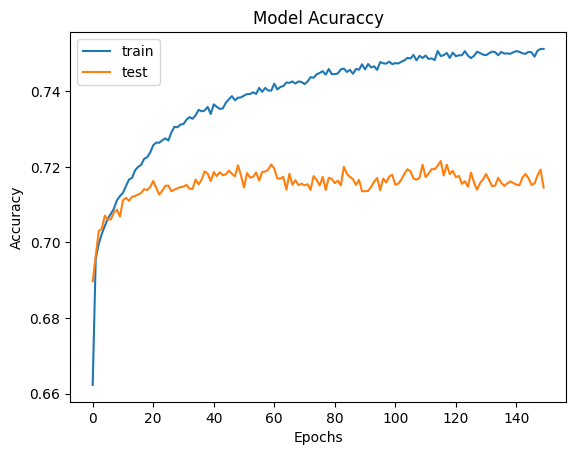

In [65]:
plt.plot(history.history['accuracy'] )
plt.plot(history.history['val_accuracy'] )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.title('Model Acuraccy')

Text(0.5, 1.0, 'Model Loss')

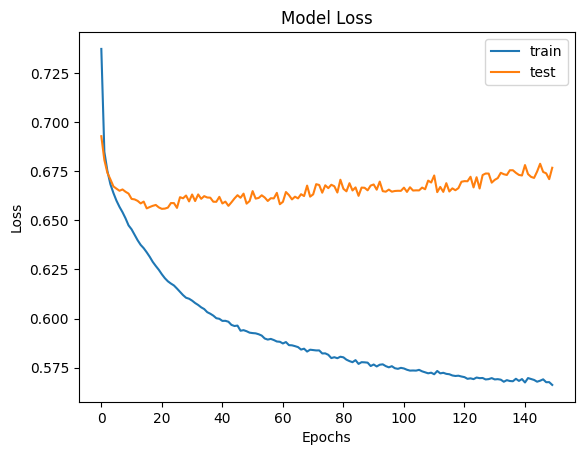

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.title('Model Loss')

----------------------------------------------
